In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
surface_data = 'ERA-HIST-Tlake_surf.dat'

In [3]:
with open(surface_data, 'r') as data:
    tempr_a = []
    evap_a = []
    mix_ave_a = []
    o18_a = []
    deut_a = []
    d_frac_a = []

    for line in data:
        line_vals = line.split()
        tempr_a.append(line_vals[1])
        evap_a.append(line_vals[2])
        mix_ave_a.append(line_vals[3])
        o18_a.append(line_vals[4])
        deut_a.append(line_vals[5])
        d_frac_a.append(line_vals[-1])

    #NOTE: trim the first 341 is for 12 months per year. 
    #NOTE: trim the last 11 months that does not make a full year.
    
    surf_temp = np.array(tempr_a[341:-11], dtype = float)
    evap = np.array(evap_a[341:-11], dtype = float)
    mix_ave = np.array(mix_ave_a[341:-11], dtype = float)
    o18 = np.array(o18_a[341:-11], dtype = float)
    deut = np.array(deut_a[341:-11], dtype = float)
    d_frac = np.array(d_frac_a[341:-11], dtype = float) 


In [4]:
def season_ave(datain, month_yr):
    num_yr = datain.shape[0] // month_yr 
    season_yr = datain.reshape(month_yr, num_yr)
    season_ave = season_yr.mean(1)
    return season_ave

In [5]:
def plot_surf_output(datain_a, name, unit, mix = False):
    matplotlib.style.use('ggplot')
    fig1 = plt.figure(figsize = (8, 8))
    ax1 = fig1.add_subplot(1,1,1)
    plt.plot(datain_a,  linewidth = 2)
    plt.xlabel('Months', fontsize = 14)
    plt.ylabel(unit, fontsize = 18)
    plt.xlim(-0.5, 5.5)
    plt.xticks(np.arange(0,12), np.arange(1,13),fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(name, fontsize = 17)
    if mix == True:
    	plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

In [6]:
temp_season_ave = season_ave(surf_temp, 12)

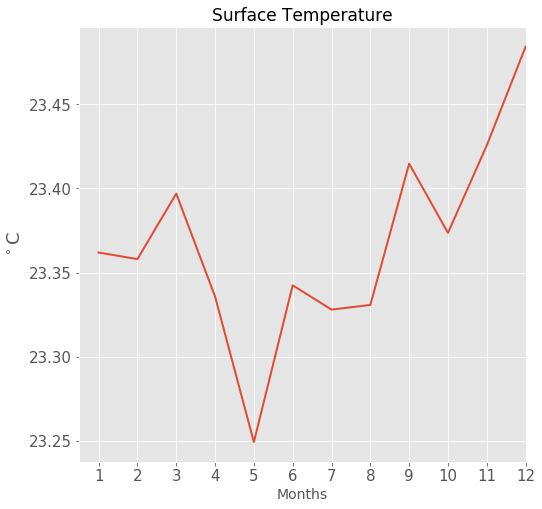

In [7]:
plot_surf_output(temp_season_ave, 'Surface Temperature', '$^\circ$C')

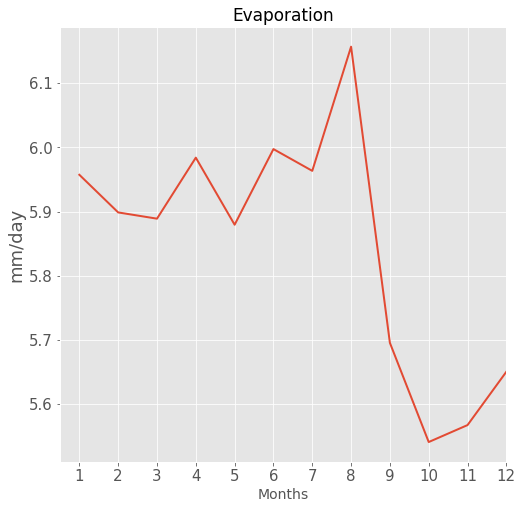

In [8]:
evap_season_ave = season_ave(evap, 12)
plot_surf_output(evap_season_ave, 'Evaporation', 'mm/day')

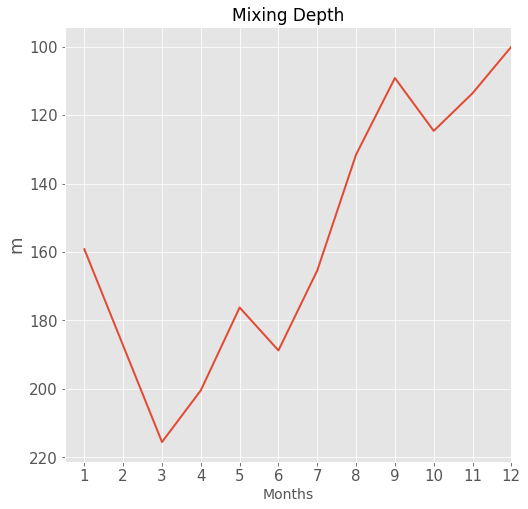

In [9]:
mix_season_ave = season_ave(mix_ave, 12)
plot_surf_output(mix_season_ave, 'Mixing Depth', 'm', mix = True)

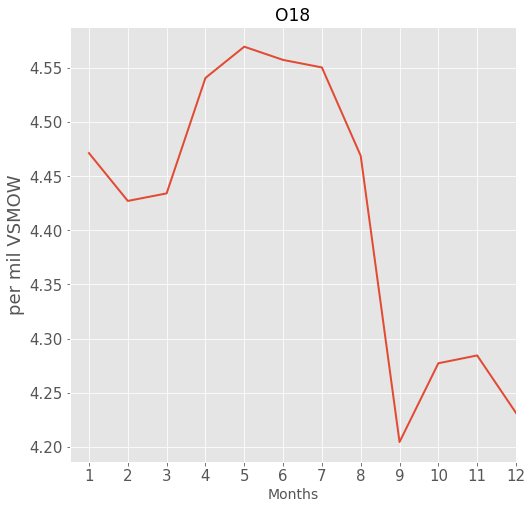

In [10]:
o18_season_ave = season_ave(o18, 12)
plot_surf_output(o18_season_ave, 'O18', 'per mil VSMOW') 

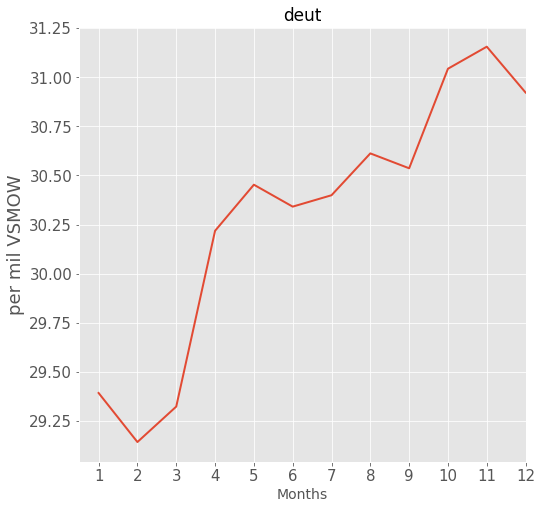

In [11]:
deut_season_ave = season_ave(deut, 12)
plot_surf_output(deut_season_ave, 'deut', 'per mil VSMOW') #TODO: verify name and unit 

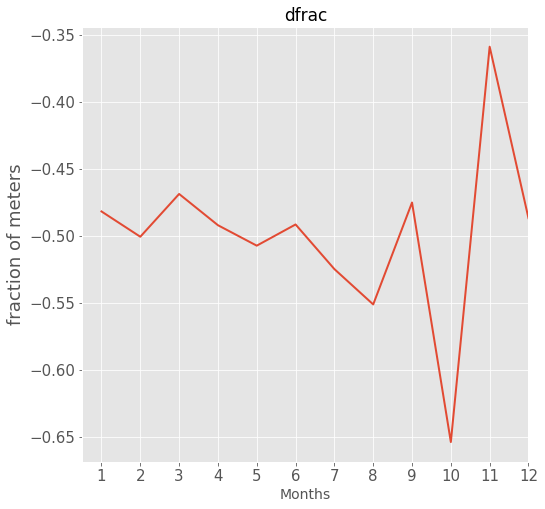

In [12]:
d_frac_season_ave = season_ave(d_frac, 12)
plot_surf_output(d_frac_season_ave, 'dfrac', 'fraction of meters') #TODO: verify name and unit 